<p style="font-size: 10px; line-height: 1.1;">
Proceedings of the XVIII ECSMGE 2024<br>
GEOTECHNICAL ENGINEERING CHALLENGES<br>
TO MEET CURRENT AND EMERGING NEEDS OF SOCIETY<br>
© 2024 the Authors<br>
ISBN 978-1-032-54816-6
</p>

# <center>Hydrical and mechanical properties assessment of basalts from Madeira Island, Portugal</center>
### <center>Évaluation des propriétés hydriques et mécaniques des basaltes de l'&#238;le de Madère, Portugal</center>
Nora Cueto Mendoza<sup>1,2</sup>, José Fernando Vieira de Sousa<sup>2</sup>, João Pedro Santos Perneta<sup>2</sup>, Ronny Adrián Meza<sup>3</sup>, Maria Luísa Pereira<sup>4</sup>, 

<sup>1</sup>University of Alicante, Spain; <sup>2</sup>Laboratório Regional de Engenharia Civil, Madeira Island, Portugal; <sup>3</sup>University of Granada, Granada, Spain and GIS4tech, Spin-Off of the University of Granada, Granada, Spain; <sup>4</sup>Instituto de Investigação em Vulcanologia e Avaliação de Riscos, Universidade dos Açores, Ponta Delgada, Portug.al>

In [41]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #statistics graphics library
import math
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from pylab import rcParams
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LinearRegression 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import tkinter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import requests
from ipywidgets import Image
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
from variable_factor_map import pca_map
from sklearn.impute import KNNImputer
import pandas as pd
import os
import qrcode
from IPython.display import Image, display
from PIL import Image as PilImage

**Table 1.** Physico-mechanical properties of the studied basalts. Mean, standard deviation (SD), minimum (Min.) and maximum (Max.) values of real, ρr, and apparent, ρb, density; total, p, and open, po, porosity; water absorption at atmospheric pressure, Ab, water absorption coefficient by capillarity, C, unit weight, γd, and uniaxial compressive strength, σc. Upper, CVS, and Middle, CVM, Volcanic Complex; number of specimens tested, Nº.

| Description | Basalt          | Statistics | ρr                 | ρb                 | p    | po   | Ab  | C                                   | γd                 | σc    |
| ----------- | --------------- | ---------- | ------------------ | ------------------ | ---- | ---- | --- | ----------------------------------- | ------------------ | ----- |
| –           | Type            | metric     | (kg/m<sup>3</sup>) | (kg/m<sup>3</sup>) | (%)  | (%)  | (%) | ((g/m<sup>2</sup>)/s<sup>0.5</sup>) | (kN/m<sup>3</sup>) | (MPa) |
| CVS         | Massive         | Nº         | 39                 | 39                 | 39   | 39   | 33  | 21                                  | 39                 | 39    |
| –           | (Very low –     | Mean       | 3065               | 2955               | 4.0  | 0.8  | 0.4 | 0.4                                 | 28.8               | 214.3 |
| –           | low porous)     | SD         | 56                 | 50                 | 2.6  | 0.9  | 0.3 | 0.3                                 | 0.5                | 54.2  |
| –           | –               | Min.       | 2973               | 2805               | 0.9  | 0.0  | 0.0 | 0.1                                 | 27.2               | 103.0 |
| –           | –               | Max.       | 3167               | 3007               | 9.4  | 2.6  | 0.8 | 1.2                                 | 29.6               | 322.4 |
| CVS         | Vesicular       | Nº         | 7                  | 7                  | 7    | 7    | \-  | 7                                   | 7                  | \-    |
| –           | (Medium porous) | Mean       | 3146               | 2383               | 24.2 | 5.0  | \-  | 2.1                                 | 22.3               | \-    |
| –           | –               | SD         | 27                 | 121                | 4.2  | 1.1  | \-  | 0.5                                 | 1.4                | \-    |
| –           | –               | Min.       | 3100               | 2175               | 20.1 | 4.1  | \-  | 1.7                                 | 20.0               | \-    |
| –           | –               | Max.       | 3174               | 2491               | 31.4 | 7.1  | \-  | 3.1                                 | 23.5               | \-    |
| CVM         | Altered         | Nº         | 10                 | 10                 | 10   | 10   | 10  | \-                                  | 10                 | 10    |
| –           | (Medium –       | Mean       | 2971               | 2580               | 12.6 | 10.0 | 4.2 | \-                                  | 25.3               | 109.9 |
| –           | high porous)    | SD         | 77                 | 248                | 7.2  | 6.9  | 3.0 | \-                                  | 2.4                | 52.5  |
| –           | –               | Min.       | 2893               | 2220               | 4.1  | 1.8  | 0.8 | \-                                  | 21.8               | 55.6  |
| –           | –               | Max.       | 3162               | 2893               | 23.4 | 20.4 | 9.0 | \-                                  | 28.4               | 212.5 |

## Exploratory Data Analysis

In [2]:
#Data path
route = "C:\\Users\\Ronny (MSI)\\OneDrive - UNIVERSIDAD DE GRANADA\\Documentos\\PHD_UGR\\Articulo_Nora\\Matriz_Datos\\data\\"

In [3]:
#Reading the data
df = pd.read_excel(route + 'Matriz_de_datos_ECSMGE2024_SPSS.xlsx', sheet_name='Matriz Limpia SPSS', header=0)

In [4]:
#Data visualization
df.head(6)

Specimen Facies           BD         P           RD        PT        Ab   C  \
0    BcSV1     Bc  2912.143838  2.626263  3150.670104  8.799679  0.735080 NaN   
1    BcSV2     Bc  2984.162798  2.257552  3143.298174  6.691879  0.633921 NaN   
2    BcSV3     Bc  2987.208993  2.152805  3151.966617  6.016612  0.611434 NaN   
3    BcSV4     Bc  2994.907991  2.084652  3130.423750  5.658242  0.603577 NaN   
4    BcSV5     Bc  2967.260835  2.167061  3167.078121  7.250149  0.621406 NaN   
5    BcSV6     Bc  2976.552723  2.103394  3115.994109  5.171731  0.461067 NaN   

          DW         UCS   LN(UCS)  
0  28.185269  197.304014  5.284746  
1  28.767791  204.271999  5.319452  
2  29.055892  241.338574  5.486201  
3  28.968820  238.632984  5.474927  
4  28.811989  124.810529  4.826797  
5  29.021973  245.855222  5.504743

## Data Transformation
In this section, the data will be refined by removing redundancy and applying transformations to certain variables

In [5]:
#Removing the columns UCS
df.drop(['UCS'], axis= 1, inplace = True)

## Descriptive statistics
In this section, the data can be analyzed using descriptive statistics such as mean, median, standard deviation, maximum, and minimum values. The objective is to identify variables with similar values, as well as those that differ significantly.

In [6]:
#Descriptive statistics visualization
np.round(df.iloc[:,2:].describe(), 2)

BD      P       RD     PT     Ab      C     DW  LN(UCS)
count    56.00  56.00    56.00  56.00  43.00  28.00  56.00    49.00
mean   2816.45   2.98  3058.20   8.03   1.26   0.80  27.34     5.19
std     247.11   4.59    74.79   8.00   2.17   0.85   2.61     0.43
min    2174.86   0.02  2892.50   0.88   0.03   0.07  20.02     4.02
25%    2764.09   0.22  3007.73   2.17   0.14   0.16  27.12     5.05
50%    2943.55   1.73  3042.36   5.41   0.60   0.41  28.64     5.27
75%    2981.39   4.12  3128.90   8.78   0.75   1.31  28.98     5.50
max    3006.66  20.38  3174.23  31.36   8.97   3.12  29.58     5.78

## Separation by rock facies
In order to study the properties of each type of rock facies, the data will be filtered based on the rock facies category.

In [7]:
#Visualization of rock facies available
list(set(df['Facies']))

['Bc', 'Bca', 'Bv']

In [8]:
#Filtered based on the rock facies category
BvS = df[df['Facies'] == 'Bv']
BcS = df[df['Facies'] == 'Bc']
Bca = df[df['Facies'] == 'Bca']

In [9]:
#Summary by rock facies BvS
np.round(BvS.iloc[:,2:].describe(), 2)

BD     P       RD     PT   Ab     C     DW  LN(UCS)
count     7.00  7.00     7.00   7.00  0.0  7.00   7.00      0.0
mean   2383.07  4.96  3145.62  24.22  NaN  2.09  22.25      NaN
std     120.70  1.09    27.07   4.18  NaN  0.51   1.35      NaN
min    2174.86  4.09  3100.47  20.13  NaN  1.70  20.02      NaN
25%    2327.82  4.25  3132.14  21.30  NaN  1.72  21.49      NaN
50%    2395.69  4.32  3149.69  22.73  NaN  1.88  22.77      NaN
75%    2482.25  5.37  3165.33  26.37  NaN  2.24  23.25      NaN
max    2490.77  7.09  3174.23  31.36  NaN  3.12  23.51      NaN

In [10]:
#Summary by rock facies BcS
np.round(BcS.iloc[:,2:].describe(), 2)

BD      P       RD     PT     Ab      C     DW  LN(UCS)
count    39.00  39.00    39.00  39.00  33.00  21.00  39.00    39.00
mean   2954.96   0.83  3064.95   3.95   0.37   0.37  28.76     5.33
std      49.65   0.87    55.67   2.61   0.27   0.34   0.53     0.26
min    2805.42   0.02  2973.12   0.88   0.03   0.07  27.22     4.64
25%    2940.53   0.12  3027.91   1.84   0.11   0.13  28.56     5.16
50%    2971.54   0.38  3043.99   2.96   0.35   0.21  28.91     5.32
75%    2986.74   1.79  3122.60   5.93   0.62   0.43  29.04     5.53
max    3006.66   2.63  3167.08   9.37   0.76   1.18  29.58     5.78

In [11]:
#Summary by rock facies Bca
np.round(Bca.iloc[:,2:].describe(), 2)

BD      P       RD     PT     Ab    C     DW  LN(UCS)
count    10.00  10.00    10.00  10.00  10.00  0.0  10.00    10.00
mean   2579.63   9.98  2970.71  12.58   4.19  NaN  25.34     4.60
std     248.02   6.90    77.24   7.16   3.05  NaN   2.43     0.46
min    2219.97   1.78  2892.50   4.15   0.79  NaN  21.81     4.02
25%    2349.68   5.23  2919.39   7.00   2.01  NaN  23.08     4.25
50%    2628.01   7.70  2959.75  10.63   3.27  NaN  25.80     4.59
75%    2764.09  16.33  2991.55  19.10   6.83  NaN  27.17     4.98
max    2893.15  20.38  3162.46  23.44   8.97  NaN  28.40     5.36

## Histograms
In this section, the graph displays histograms of each rock facies for every variable. The aim of this graph is to identify whether each rock facies exhibits statistical properties that can aid in characterizing each type of rock facies.

<Figure size 1600x800 with 0 Axes>

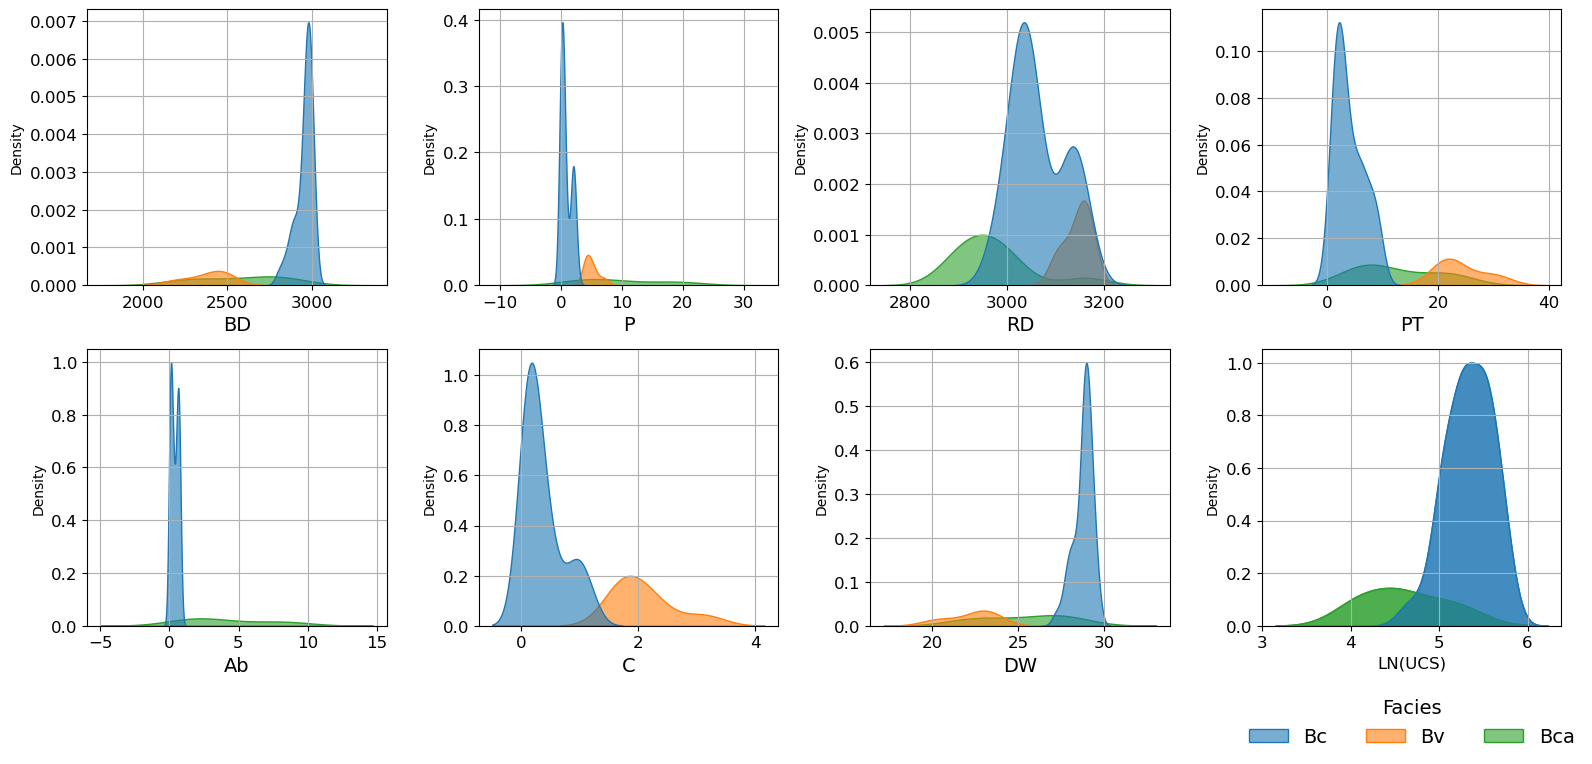

In [12]:
# Create subplots
plt.figure(figsize=(16, 8))
variable = list(df.iloc[:, 2:-1].columns)
n_variables = len(variable)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < n_variables:
        j = variable[i]
        sns.kdeplot(data=df, x=j, hue="Facies", fill=True, alpha=0.6, ax=ax, warn_singular=False, legend=False)
        ax.set_xlabel(j, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.grid(True)
    else:
        ax.axis('on')

# Create the last subplot
last_subplot = plt.subplot(2, 4, n_variables + 1)
sns.kdeplot(data=df, x='LN(UCS)', hue="Facies", fill=True, alpha=0.6, ax=last_subplot, warn_singular=False)
last_subplot.set_xlabel('LN(UCS)', fontsize=14)
last_subplot.tick_params(axis='both', which='major', labelsize=14)
last_subplot.grid(True)

# Adjust graphs and borders
plt.tight_layout()

# Create the last subplot
last_subplot = plt.subplot(2, 4, n_variables + 1)
sns.kdeplot(data=df, x='LN(UCS)', hue="Facies", fill=True, alpha=0.6, ax=last_subplot, warn_singular=False)
last_subplot.set_xlabel('LN(UCS)', fontsize=12)
last_subplot.tick_params(axis='both', which='major', labelsize=12)
last_subplot.grid(True)

# Move the legend outside
sns.move_legend(last_subplot, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3, fontsize=14, 
                frameon=False, title_fontsize = 14)

# Adjust graphs and borders
plt.tight_layout()

plt.show()

The histograms clearly illustrate distinct mean and standard deviation values for each rock facies. This indicates that statistical measures can effectively characterize the various rock facies, as evidenced by the characteristic centroids displayed in the graphs.

## Boxplots by each rock facies
The boxplot is another useful graphical resource for observing the behavior of each variable across different rock facies. In each graph, variations in statistics such as mean, standard deviation, and box shape are evident among the different rock facies.

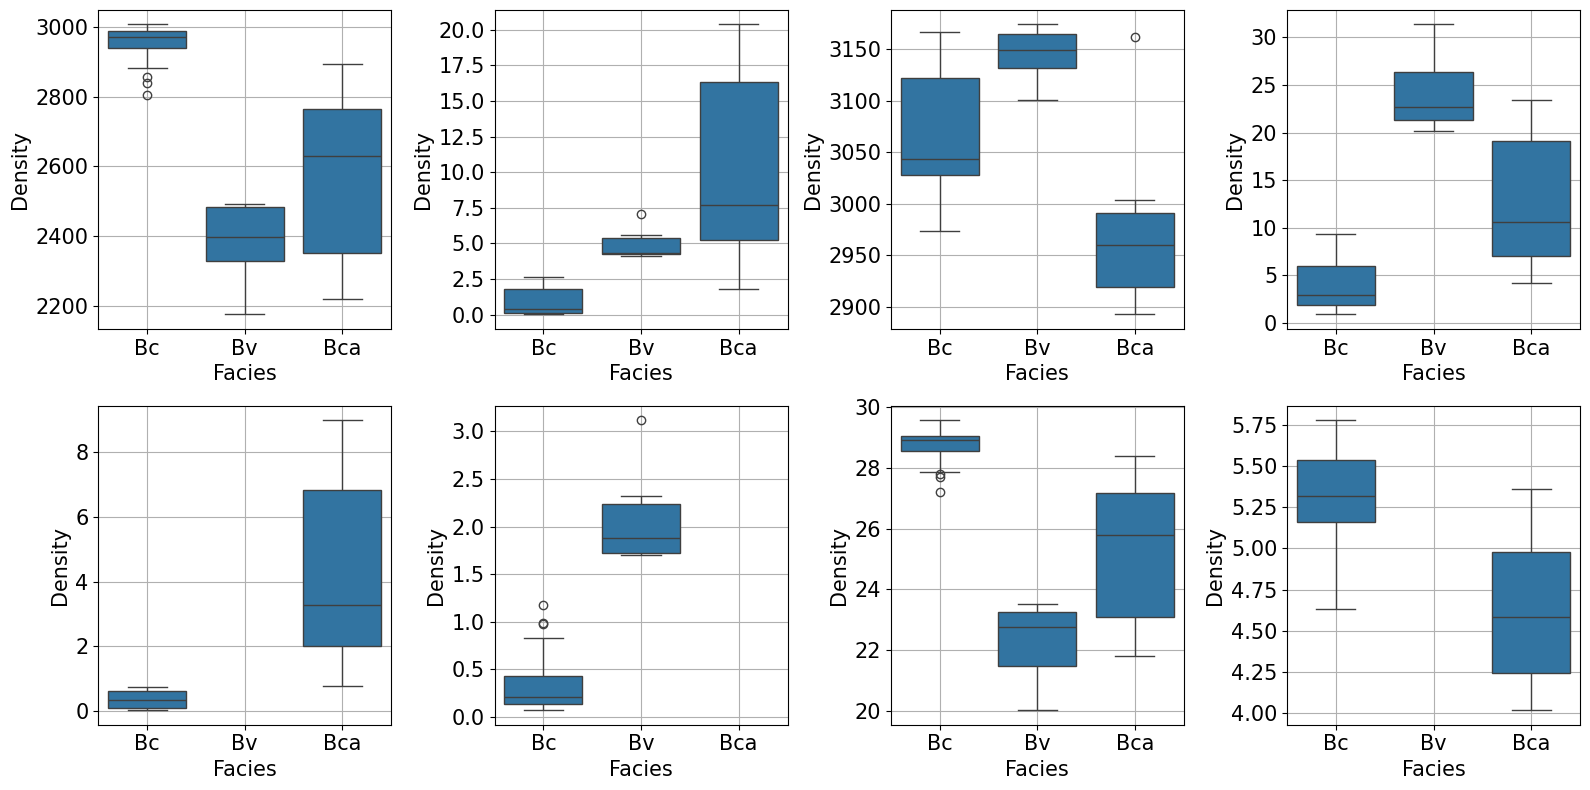

In [13]:
# Boxplots
data = df.iloc[:,2:]

# Create the boxplots
plt.figure(figsize=(16, 8))
variable = list(data.columns)

for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=df["Facies"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # Adjust the font size
    plt.xlabel('Facies', fontsize=15)  
    plt.ylabel('Density', fontsize=15)  
    plt.grid()

# Adjust graphs and borders
plt.tight_layout()

# Save the graph
plt.savefig('boxplots.png', bbox_inches='tight')
plt.show()

## Heatmap
The heatmap displays a cross-correlation of variables using a lower triangular array. The graph allows us to observe variables that are positively correlated, as well as those that are inversely correlated. Additionally, it enables the identification of variables that exhibit no correlation.

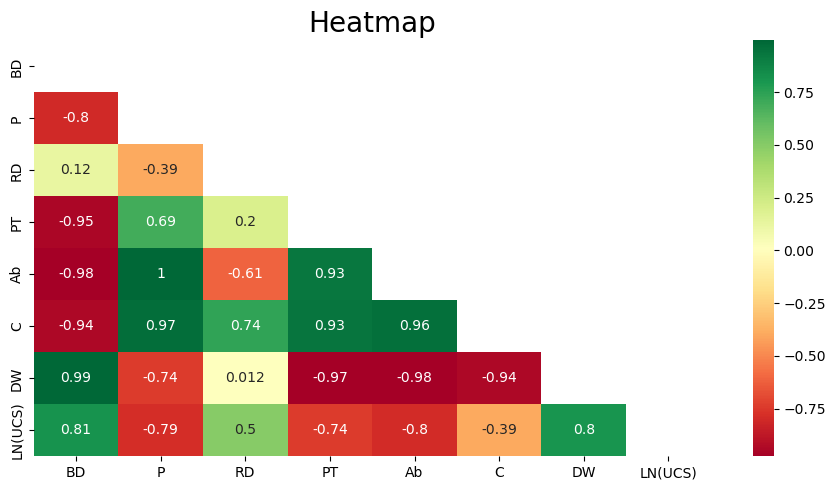

In [14]:
#Correlation Matrix
corr= df.iloc[:,2:].corr()

# Lower triangular array
matrix = np.triu(corr)

plt.subplots(figsize=(9, 5))

plt.title('Heatmap', fontsize = 20)
sns.heatmap(corr, annot=True, mask=matrix, cmap="RdYlGn")
plt.tight_layout() 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
# Save the heatmap
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

## Outlier detection
In exploratory data analysis, detecting outliers is crucial as they can significantly impact statistical calculations. Outliers can influence the centroids that define various rock facies, thereby affecting the overall analysis. Therefore, it is not only important to detect outliers but also to remove them from the dataset.

In [15]:
def detect_outliers_iqr(df, threshold=1.25):
    # Calculate the interquartile range (IQR) for each column
    Q1 = df.quantile(0.1)
    Q3 = df.quantile(0.9)
    IQR = Q3 - Q1
    
    # Define the limits to identify outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Detect outliers in each column
    outliers = (df < lower_bound) | (df > upper_bound)
    
    # Combines the results into a Boolean DataFrame indicating the presence of outliers in each row
    return outliers.any(axis=1)

def detect_outliers_zscore(df, threshold=3):
    # Calculate the Z score for each column
    z_scores = np.abs((df - df.mean()) / df.std())
    
    # Detect outliers in each column
    outliers = z_scores > threshold
    
    # Combines the results into a Boolean DataFrame indicating the presence of outliers in each row
    return outliers.any(axis=1)

if __name__ == "__main__":
    
    # Detect outliers using IQR
    outliers_iqr = detect_outliers_iqr(df.iloc[:, 3:])
    
    # Detect outliers using Z-score
    outliers_zscore = detect_outliers_zscore(df.iloc[:, 2:])
    
    # Combine the results of both outlier detections
    outliers_combined = outliers_iqr | outliers_zscore
    
    # Filter the original DataFrame to get only the rows that contain outliers
    df_outliers = df[outliers_combined]
    
    # Print the DataFrame with the rows containing outliers
    display(np.round(df_outliers, 2))

Specimen Facies       BD      P       RD     PT    Ab   C     DW  LN(UCS)
49    BcaE4    Bca  2283.62  19.02  2925.27  21.62  8.18 NaN  22.44     4.20
53    BcaE8    Bca  2219.97  20.38  2909.59  23.44  8.97 NaN  21.81     4.02
54    BcaE9    Bca  2301.75  17.93  2917.43  20.93  7.58 NaN  22.61     4.05

In [16]:
#List of rows that you want to delete from the original DF
outliers = df_outliers.index.to_list()

new_df = df.drop(outliers).reset_index(drop=True)

In [17]:
#Visualization of the New DF (Rock Facies Bca)
new_df[new_df.Facies == "Bca"]

Specimen Facies           BD          P           RD         PT        Ab  \
46    BcaE1    Bca  2775.793356   6.182874  2981.938276   6.473725  2.067358   
47    BcaE2    Bca  2843.563764   3.185185  2994.748447   4.147418  1.152086   
48    BcaE3    Bca  2724.438008   5.173913  2968.268485   7.499705  2.446725   
49    BcaE5    Bca  2493.483045  11.505065  2892.504838  13.442990  4.601209   
50    BcaE6    Bca  2728.961496   5.396114  3003.651418   6.832471  1.989362   
51    BcaE7    Bca  2531.587481   9.218289  2951.228571  13.588560  4.093871   
52   BcaE10    Bca  2893.145376   1.775837  3162.462496   7.816644  0.786539   

     C         DW   LN(UCS)  
46 NaN  27.286269  5.087855  
47 NaN  27.926051  4.644702  
48 NaN  26.748574  5.090307  
49 NaN  24.495033  4.647726  
50 NaN  26.820462  4.400399  
51 NaN  24.852186  4.525499  
52 NaN  28.400340  5.358899

In [18]:
#The new DF is backed up for later use
new_df.to_excel(route + 'Datos_2_Vs1_sin_Outliers.xlsx')

## Boxplots without outliers

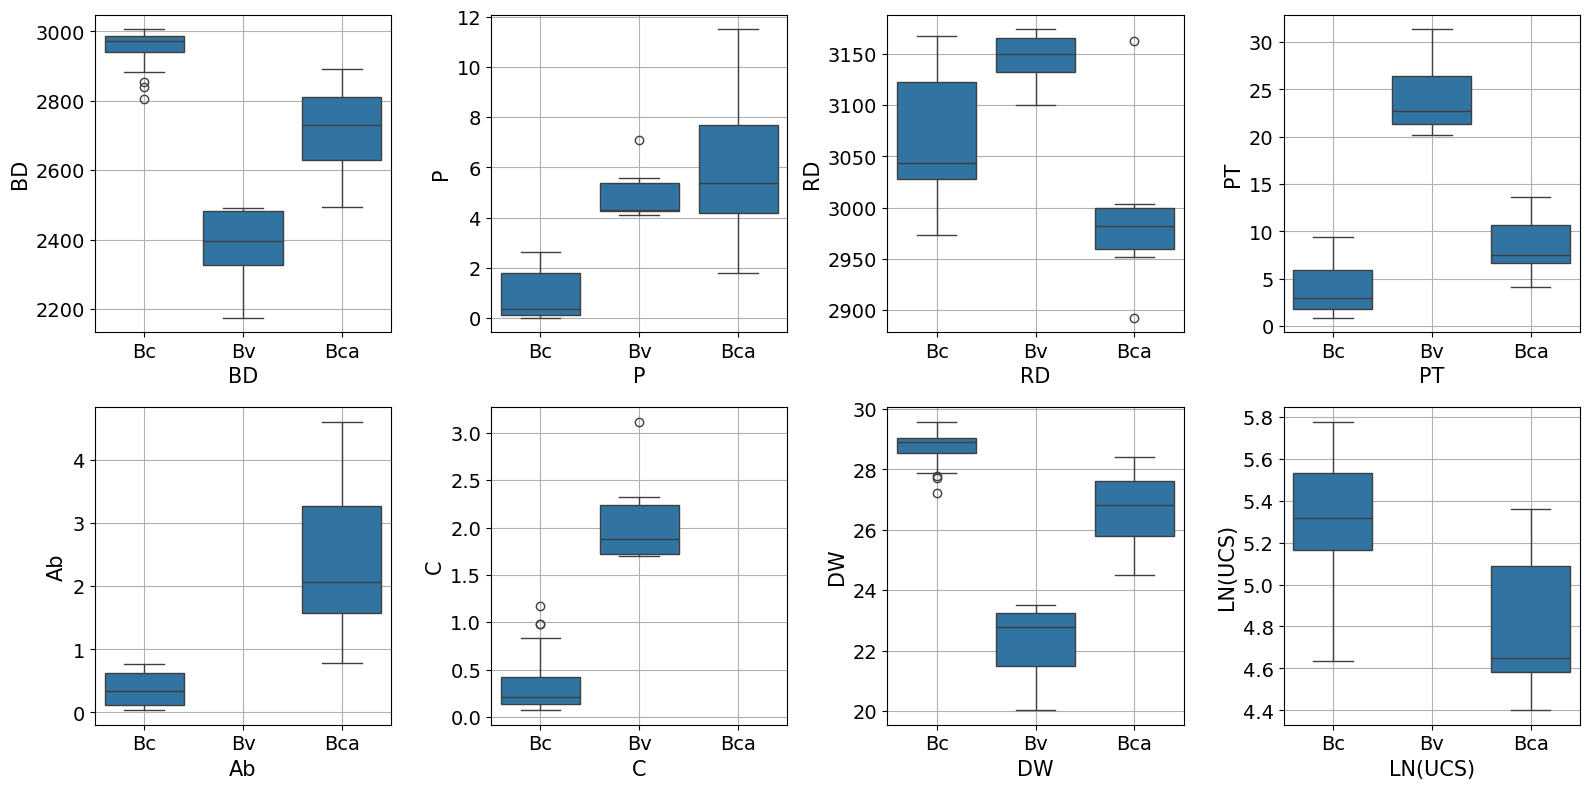

In [19]:
# Boxplots
data = new_df.iloc[:, 2:]

# Create the boxplots in a 3x4 subplot
plt.figure(figsize=(16, 8))
variable = list(data.columns)

for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=new_df["Facies"], y=j)
    plt.ylabel(j, fontsize=15)
    plt.xlabel(j, fontsize=15)
    
    # Adjust axes font size
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)  # Adjust the font size here

    plt.grid()

# Adjust margins and spacing between subplots
plt.tight_layout()

# Restore font sizes to their default values
#plt.rcdefaults()

# Save the graph
plt.savefig('boxplots_limpio.png', bbox_inches='tight')
plt.show()

In the extended box and whisker plots, an enlargement of the boxes is evident, suggesting that the removal of outliers has contributed to the normalization of the distributions.

---
## The data cleaned is imported
The DF is loaded again to maintain the structure for the graphs shown below.

In [20]:
#Reading the new data
df = pd.read_excel(route + 'Matriz_de_datos_ECSMGE2024_SPSS.xlsx', sheet_name = 'Matriz Limpia SPSS', header = 0)

#Droping the column UCS
df.drop(['UCS'], axis= 1, inplace = True)

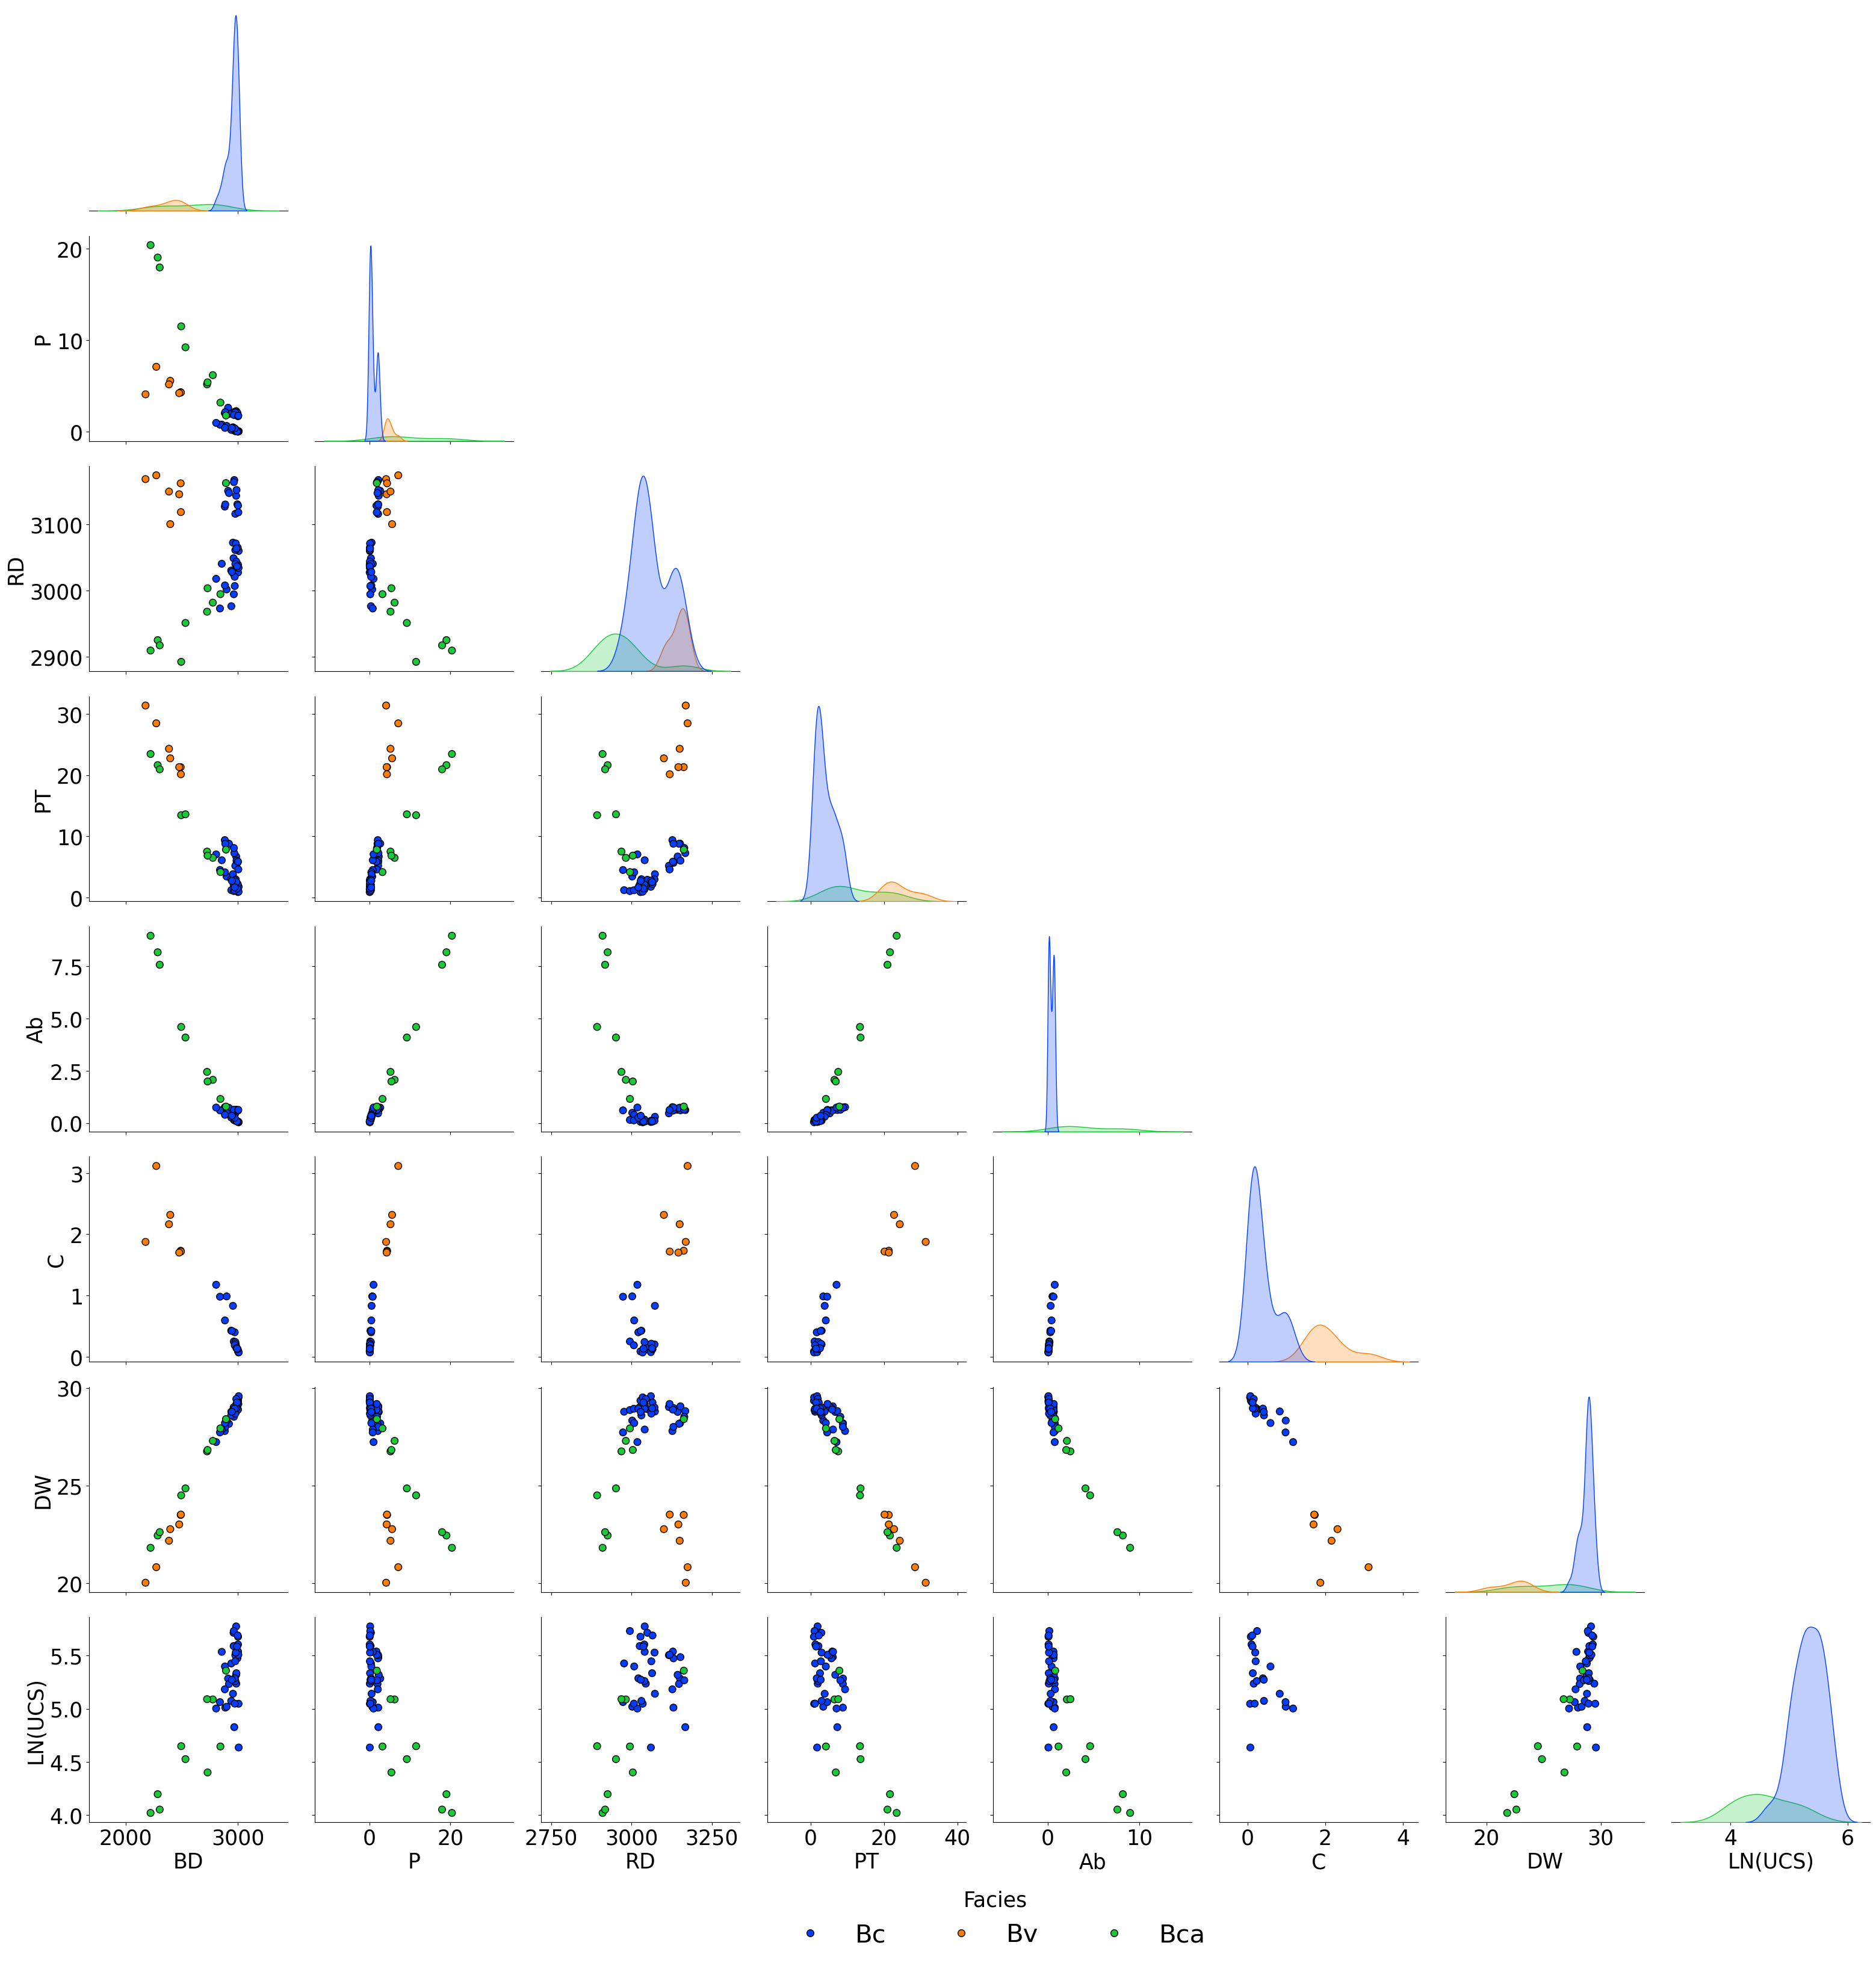

In [21]:
# Construction of cross correlation data

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

with sns.plotting_context(rc={"axes.labelsize":25}):
    g = sns.pairplot(df.drop(['Specimen'], axis=1), corner=True, hue='Facies', palette='bright', markers='o', 
                     height=4, plot_kws={"s": 70, "alpha": 1.0, 'lw': 1.0, 'edgecolor': 'k'})

sns.move_legend(g, "lower center",bbox_to_anchor=(0.5, -0.035), ncol=3, 
                title='Facies', frameon=False, fontsize=30, title_fontsize = 25)



# Adjusts the font size of the X and Y axis numbering
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Show the graph
plt.show()

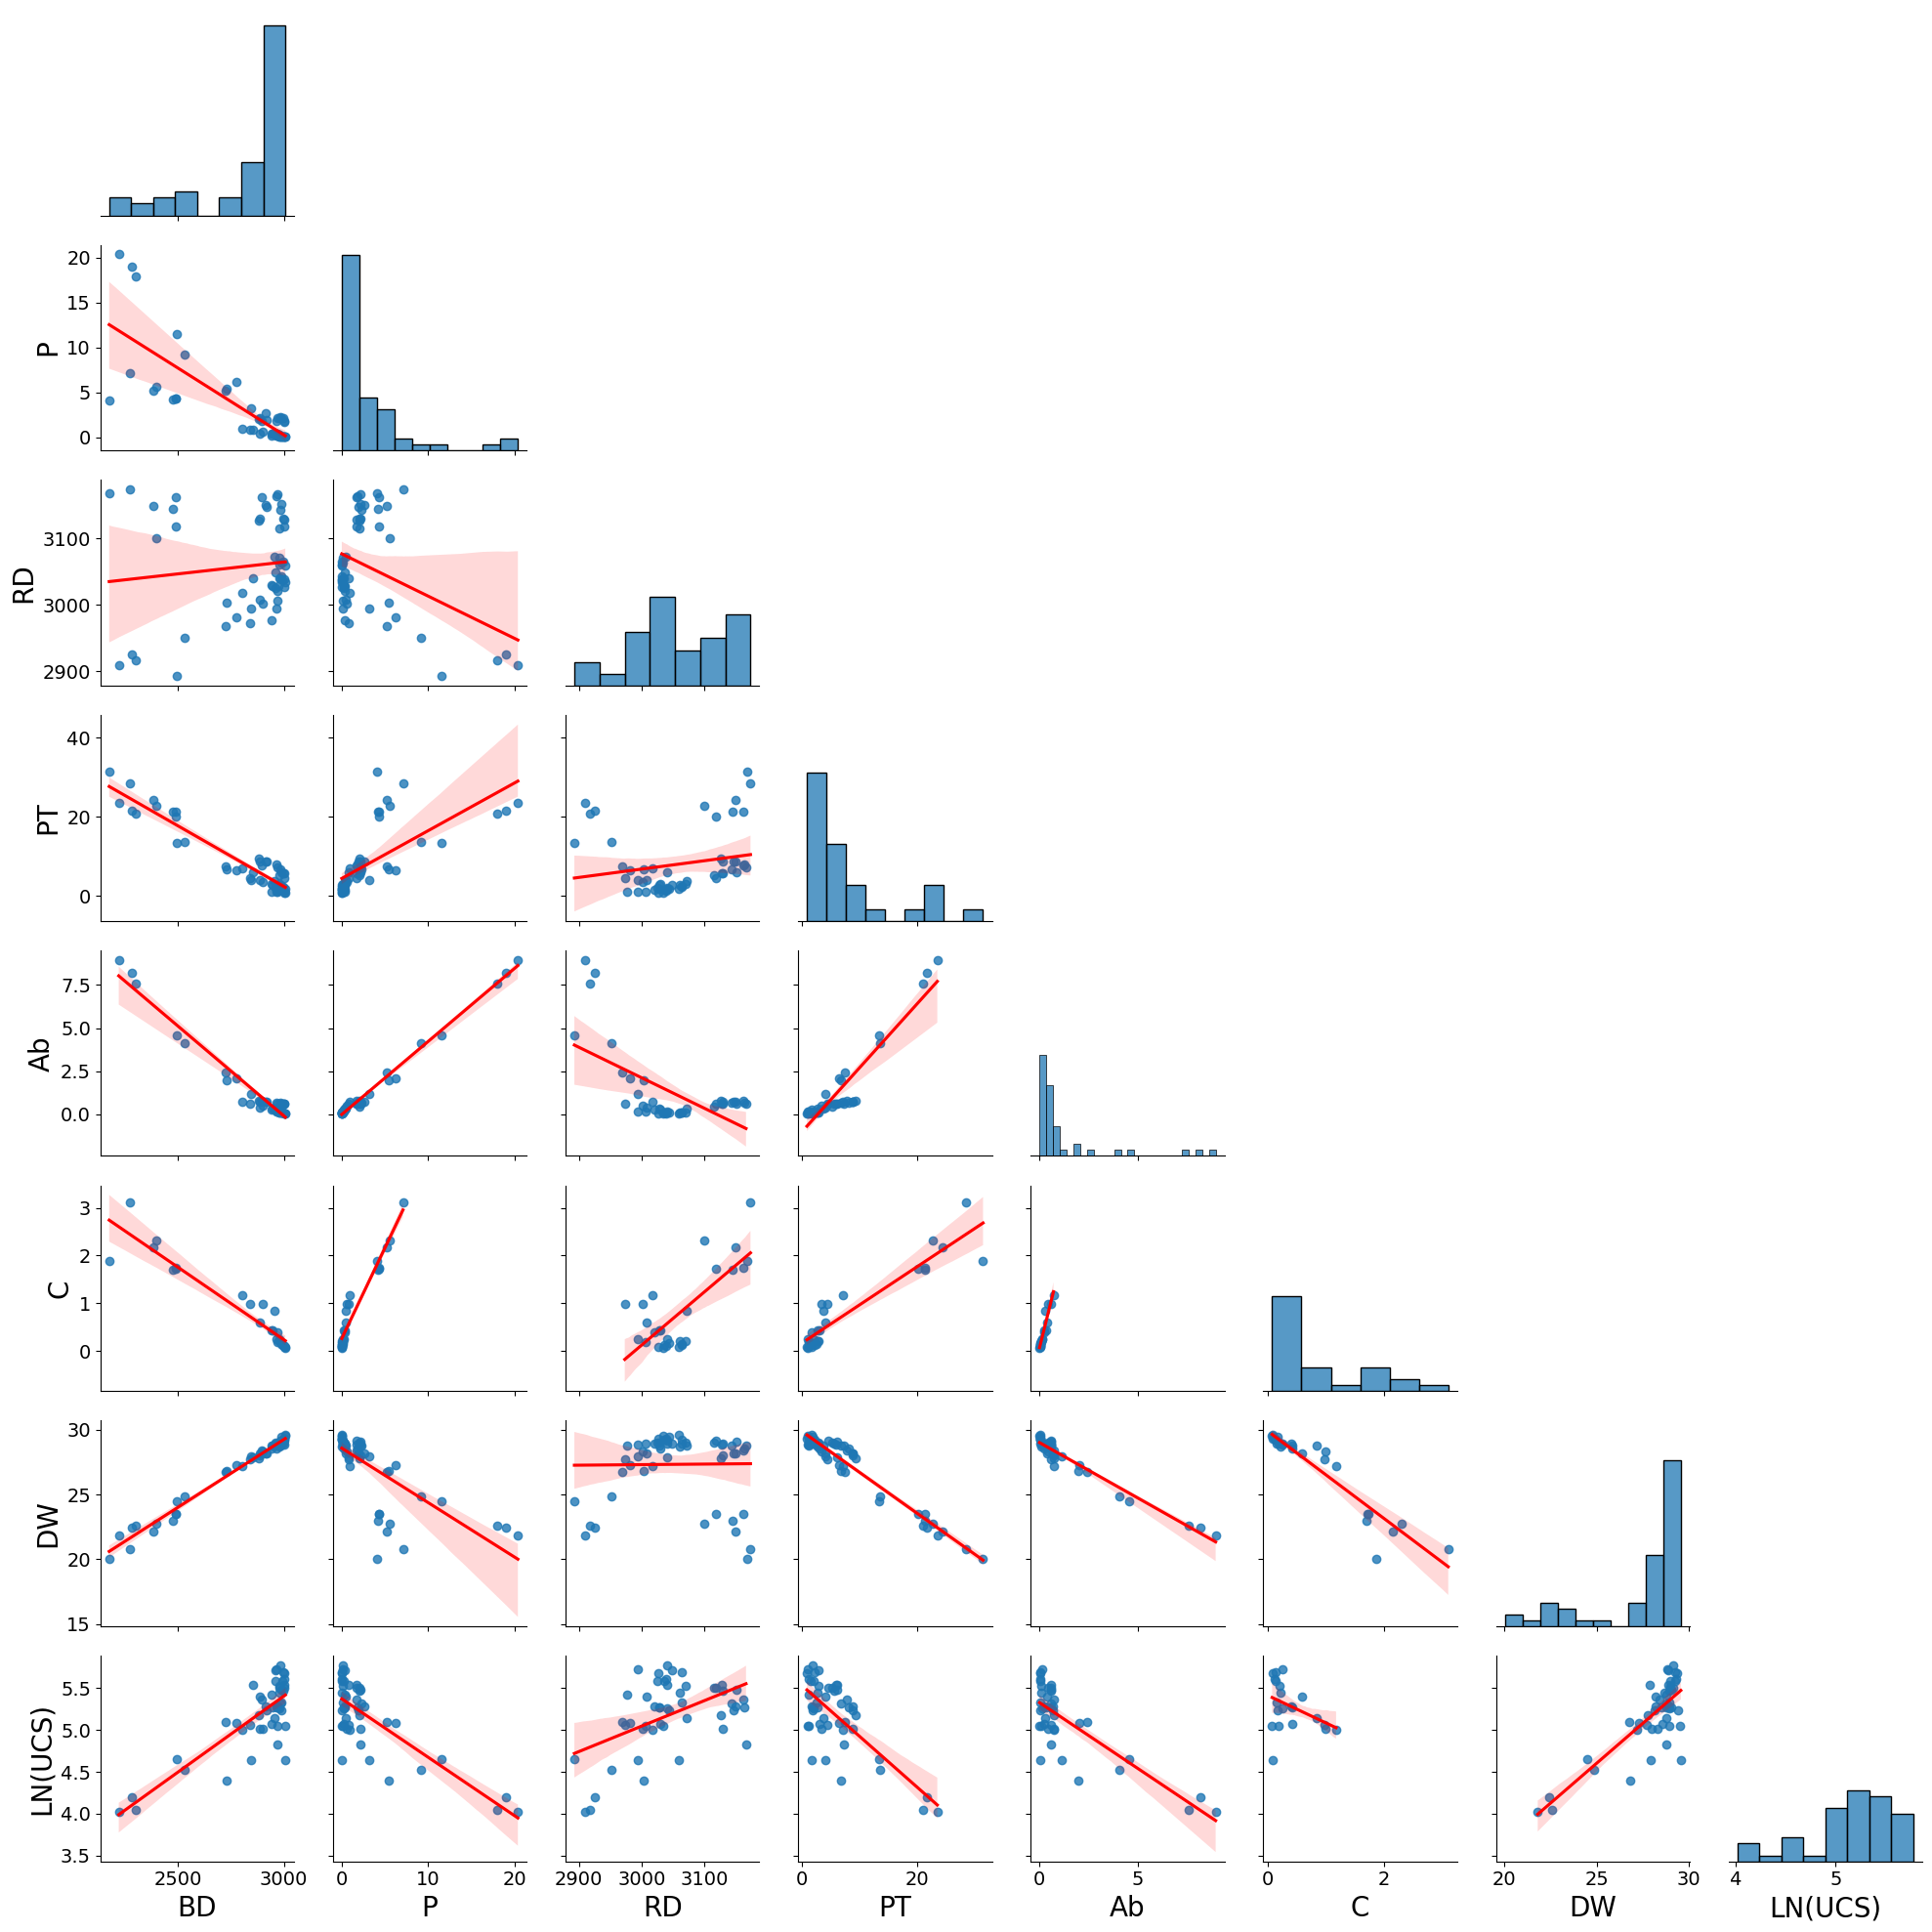

In [22]:
# Set global font size
plt.rcParams.update({'font.size': 14})  # Set global font size

# Create the pairplot plot
custom_plot_kws = {"s": 20}  # Font size of axes
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df.drop(['Facies'], axis=1), kind="reg", corner=True,
                      plot_kws={'line_kws': {'color': 'red'}})

# Additional configuration if necessary
plt.grid(True)
plt.tight_layout()

plt.show()

## Principal Component Analysis
Principal Component Analysis (PCA) is a linear dimensionality reduction technique widely used in exploratory data analysis, visualization, and data preprocessing. It transforms the data into a new coordinate system where the directions, known as principal components, capture the largest variation in the data. In our case, the goal is to identify collinear variables and independent variables that define the new dimension. It is important to note that the dataset contains missing values, necessitating data imputation since the matrix inversion process does not work with missing values.

In [23]:
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors = 5)  # Specifies the number of neighbors to consider

# Perform the imputation in the DataFrame
imputed_data = imputer.fit_transform(df.iloc[:,2:])

# The result is a NumPy array, so you can convert it back to a DataFrame
X_imputed = pd.DataFrame(imputed_data, columns = df.iloc[:,2:].columns)

#Integration with the original DF
#X_imputed = pd.concat([df.Facies, X_imputed], axis = 1)

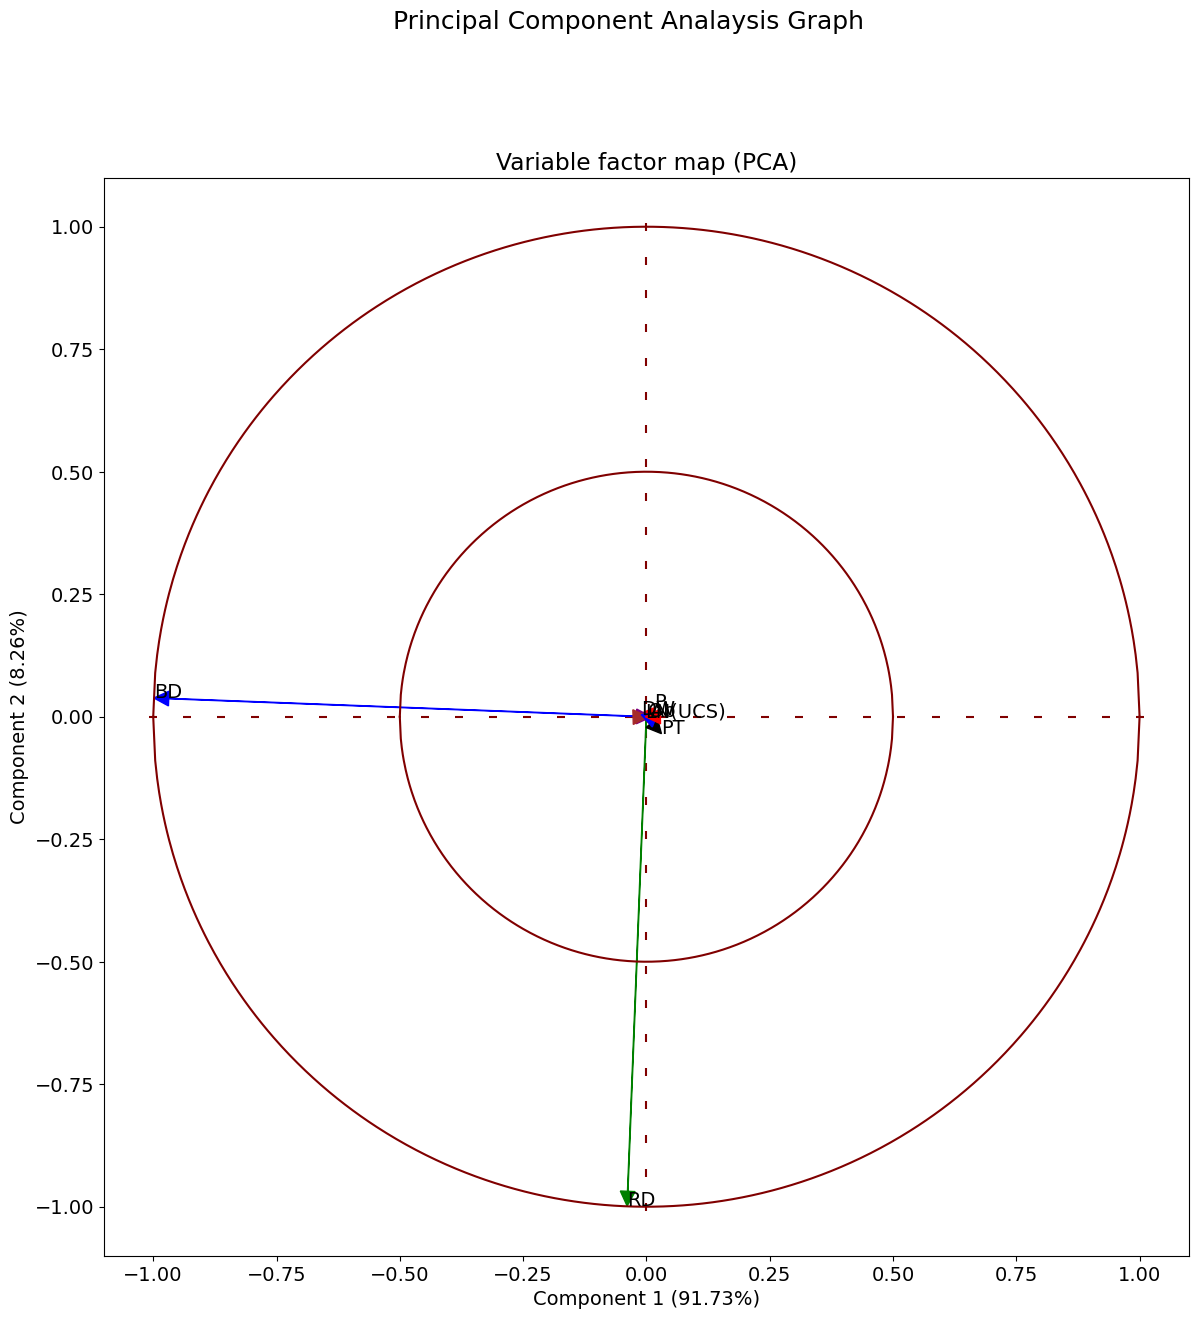

In [24]:
#Construction of PCA graph

plt.rcdefaults()  # Reset to default values

pca_map(X_imputed, figsize=(14,14), sup="Principal Component Analaysis Graph", print_values= False);

The PCA plots indicate that only two dimensions are required. The first component represents 92% of the variance, while the second component represents 8%. These two components are orthogonal and the additional variables are invisible at their intersection. To examine these variables more closely, another PCA analysis is performed with the goal of identifying the importance of other variables that may be overshadowed by RD and BD.

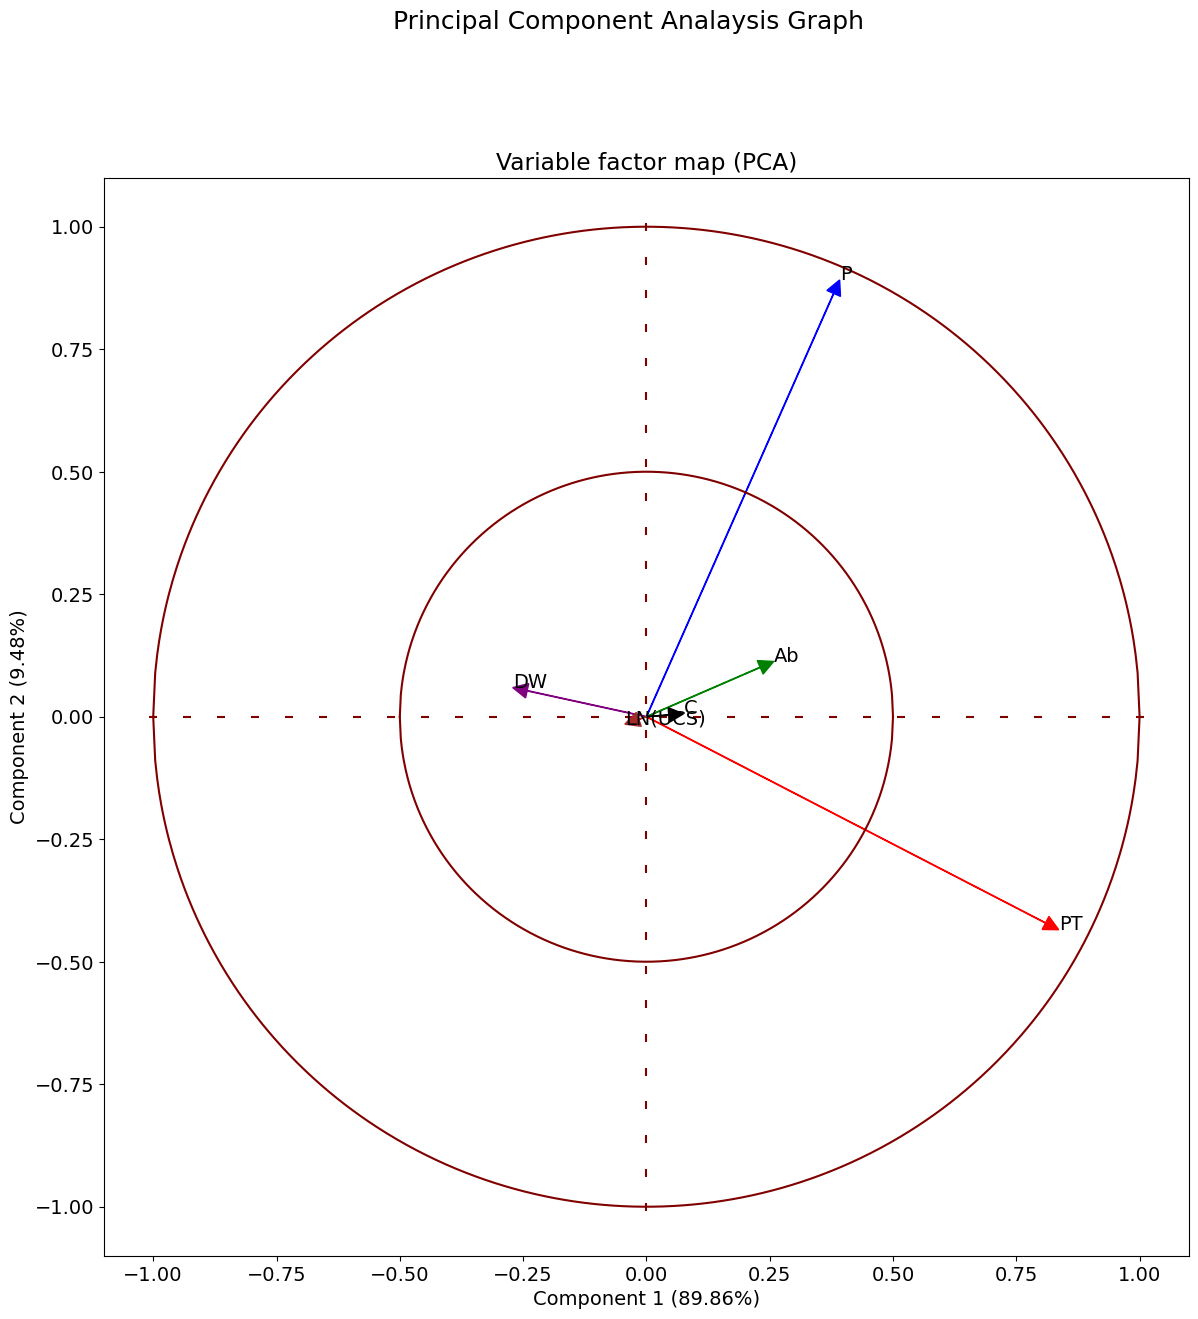

In [25]:
#Removal of principal components to evaluate the contribution of other variables
df2 = X_imputed[[ 'P', 'PT', 'Ab', 'C', 'DW', 'LN(UCS)']]

#PCA Grph (df2)
pca_map(df2, figsize=(14,14), sup="Principal Component Analaysis Graph", print_values= False);

In the PCA graph, it is evident that the variables PT-DW and P are orthogonal to each other. Additionally, DW and PT are collinear, as are the variables C and Ab.

## Cluster analysis
In the upcoming section, we will perform a cluster analysis, a non-supervised machine learning technique used to uncover hidden insights within the data. This analysis aims to assess whether the data quality is sufficient to classify rock facies without human intervention. Initially, hierarchical clustering with Ward distance will be employed. Subsequently, a K-means algorithm will be utilized for classification. The K-means algorithm partitions n observations into k clusters, with each observation assigned to the cluster with the nearest mean, serving as a prototype of the cluster.

In [26]:
# StandardScaler to standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)  # Se elige el número de componentes principales que deseas mostrar en el gráfico (2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Prior to applying clusterization techniques, dimensionality reduction is essential to mitigate issues related to data redundancy and collinearity. To identify the optimal number of dimensions, an elbow method is employed. In the graph, the point before the line exhibits an asymptotic behavior, specifically at two components. The second graph illustrates the cumulative variance explained by two components, which exceeds 95%.

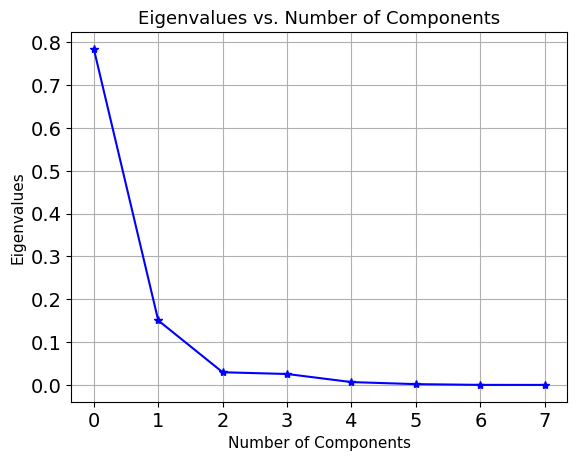

In [27]:
X_scaled=scaler.transform(X_imputed)
 
#We instantiate PCA object and apply
pca=PCA(n_components=8) 
pca.fit(X_scaled) # get the main components
X_pca=pca.transform(X_scaled) 
 
#print("shape of X_pca", X_imputed)
expl = pca.explained_variance_ratio_
 
#We graph the accumulated variance explained in the new dimensions
plt.plot(pca.explained_variance_ratio_, '-*b')
plt.xlabel('Number of Components', fontsize = 11)
plt.ylabel('Eigenvalues', fontsize = 11)
plt.title('Eigenvalues vs. Number of Components', fontsize = 13)
plt.grid()
plt.show()

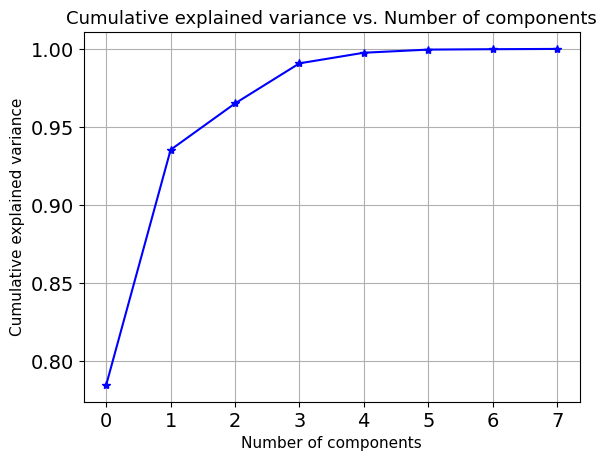

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-*b')
plt.xlabel('Number of components',  fontsize = 11)
plt.ylabel('Cumulative explained variance',  fontsize = 11)
plt.title('Cumulative explained variance vs. Number of components', fontsize = 13)
plt.grid()
plt.show()

In [29]:
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=2)  # The number of neighbors to be considered is specified

# The imputation is carried out in the DataFrame
imputed_data = imputer.fit_transform(df.iloc[:,2:])

# The result is a NumPy array, so you can convert it back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns = df.iloc[:,2:].columns)

#Integration with the original DF
imputed_df = pd.concat([df.Facies, df.Specimen, imputed_df], axis = 1)

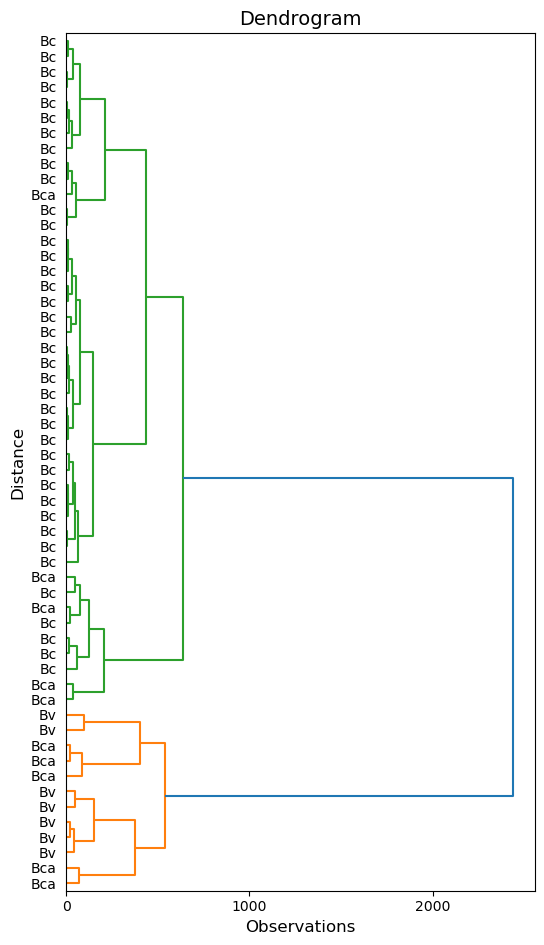

In [30]:
# Calculate the distance matrix
dist_matrix = linkage(imputed_df.iloc[:,2:], method='ward')

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

# Generate the dendrogram
plt.figure(figsize=(6, 10))
dendrogram(dist_matrix, labels=imputed_df['Facies'].values, leaf_rotation = 0,
           orientation="right", leaf_font_size=12)

# Customize the dendrogram
plt.title('Dendrogram', fontsize=14)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Specify a different font 
plt.rcParams['font.family'] = 'Arial'

# Modify font styles
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'normal'

# Show the dendrogram
plt.tight_layout()
plt.show()

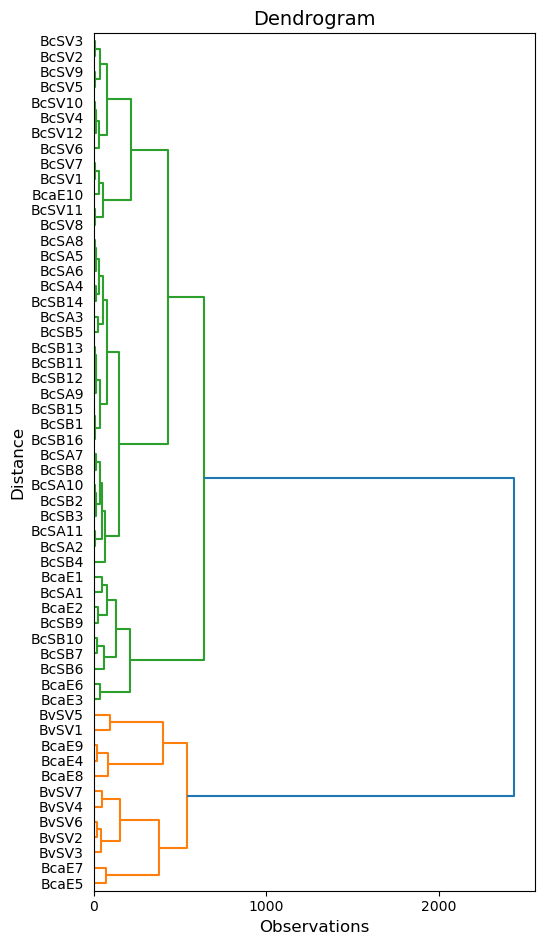

In [31]:
# Calculate the distance matrix
dist_matrix = linkage(imputed_df.iloc[:,2:], method='ward')

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

# Generate the dendrogram
plt.figure(figsize=(6, 10))
dendrogram(dist_matrix, labels=imputed_df['Specimen'].values, leaf_rotation = 0,
           orientation="right", leaf_font_size=12)

# Customize the dendrogram
plt.title('Dendrogram', fontsize=14)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Specify a different font
plt.rcParams['font.family'] = 'Arial'

# Modify font styles
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'normal'

#Show the dendrogram
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


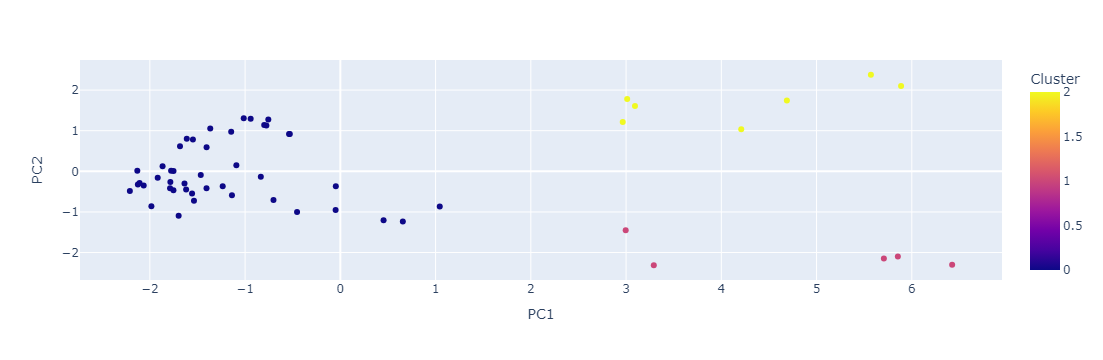

In [32]:
# Step 1: Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(imputed_df.iloc[:,2:])

# Step 2: Apply PCA
pca = PCA(n_components = 2)  # Se especifica el número de componentes principales deseados
principal_components = pca.fit_transform(normalized_data)

# Step 3: Unsupervised Clustering (K-means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Se especifica el número de clústeres con base en el análisis previo y se
# establecer una semilla (seed) para reproducibilidad

clusters = kmeans.fit_predict(principal_components)

# Step 4: Retrieve cluster labels
cluster_labels = kmeans.labels_

# Step 5: Visualization with Plotly
df_3k = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_3k['Cluster'] = clusters

fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster')
fig.show()

In [33]:
#The labeling process maintains the same order of the original DF, the names of the samples are incorporated
df_3k['Facies'] = imputed_df.Facies
df_3k['Specimen'] = imputed_df.Specimen

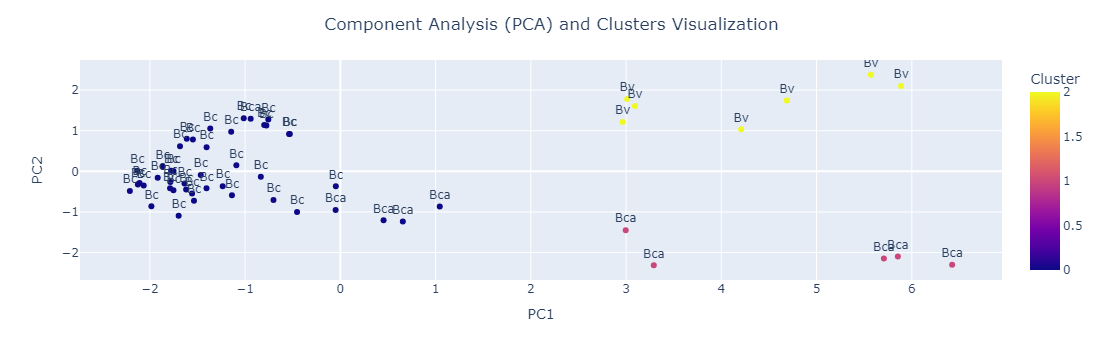

In [34]:
# Step 6: Visualization with Plotly incorporating facies name
fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster', text='Facies')
fig.update_traces(textposition='top center')  # Place the names of the samples above the points
fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5}) # Add a centered title ('x': 0.5)
fig.show()

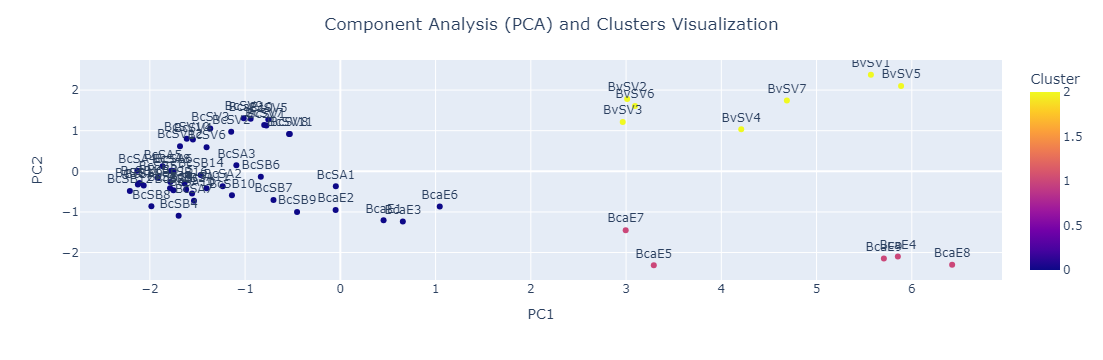

In [35]:
# Step 7: Visualization with Plotly incorporating Specimen name
fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster', text='Specimen')
fig.update_traces(textposition='top center')  # Coloca los nombres de las muestras encima de los puntos
fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5}) # Agrega un título centrado ('x': 0.5)
fig.show()

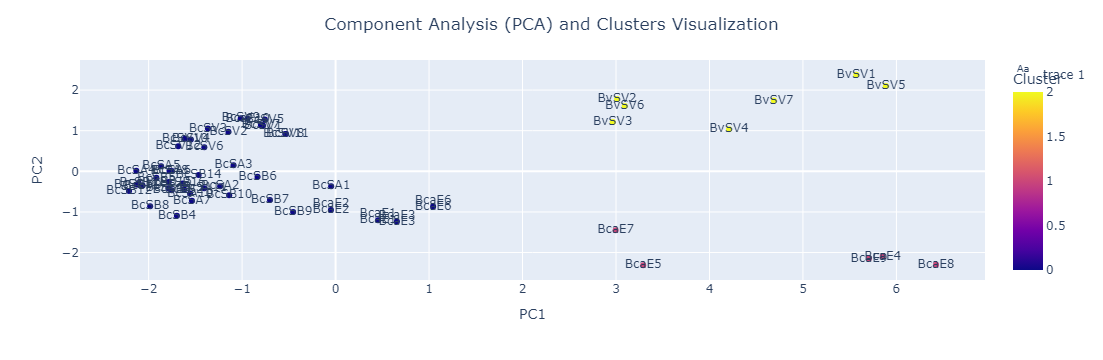

In [36]:
# Label only the following points
indices_a_etiquetar = [46, 47, 48, 51]

# Step 6: Visualization with Plotly incorporating facies name
fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster', text='Specimen')

# Assign labels only to specific points
fig.add_trace(go.Scatter(
    x=df_3k.loc[indices_a_etiquetar, 'PC1'],
    y=df_3k.loc[indices_a_etiquetar, 'PC2'],
    mode='text',
    text=df_3k.loc[indices_a_etiquetar, 'Specimen'],
    textposition='top center'
))

fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5})  # Agrega un título centrado ('x': 0.5)
fig.show()


Each color corresponds to a categorization generated through the unsupervised clustering process. Notably, the labels associated with the samples signify the different facies identified during the unsupervised classification.
In the leftmost region, the most prominent facies is denoted as **Bc**, while in the upper-right section, **Bv** dominates. The lower-right corner is characterized by the Bca facies. Notably, the central and lower regions exhibit samples with transitional characteristics. These samples, despite belonging to the Bca facies, exhibit dominant properties such as Bulk Density (BD) and Relative Density (RD), which classify them as **Bc**, as evident in PCA graph.

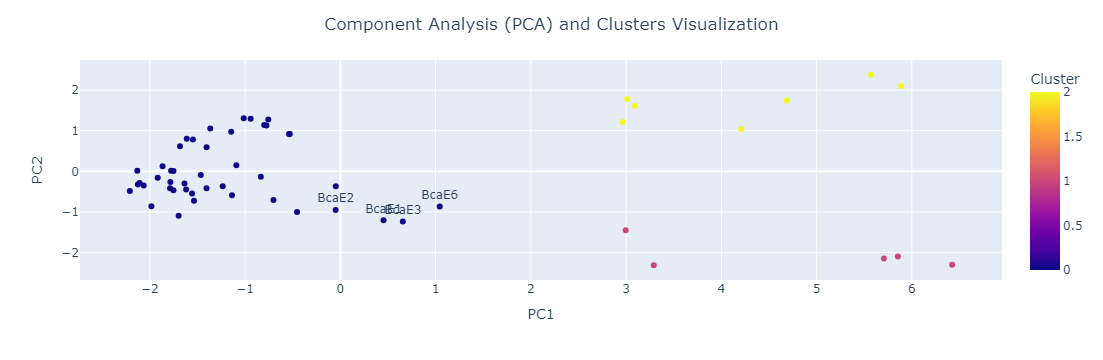

In [37]:
# Only the desired points of the DataFrame df_3k are labeled
indices_a_etiquetar = [46, 47, 48, 51]

# Visualization with Plotly incorporating facies name
fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster', text='Specimen')

# Assign labels only to specific points and leave the rest unlabeled
fig.update_traces(textposition='top center')
fig.data[0].text = [facies if i in indices_a_etiquetar else None for i, facies in enumerate(df_3k['Specimen'])]

fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5})  # Add a centered title ('x': 0.5)
fig.show()


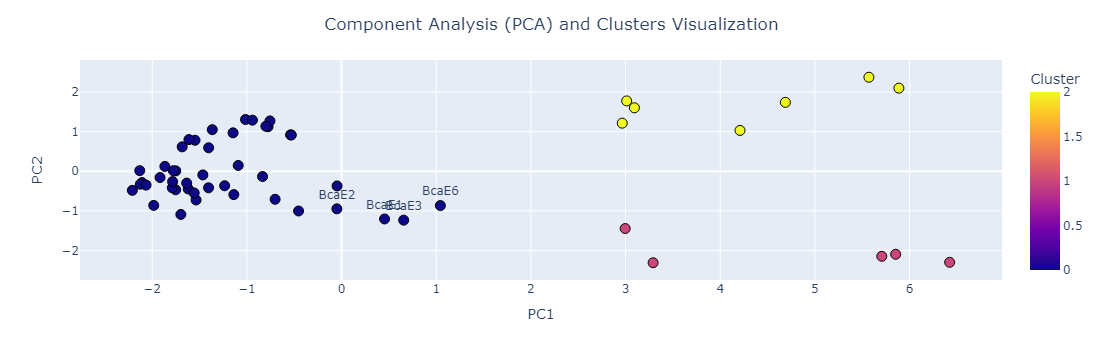

In [38]:
# A list will be constructed to only label some elements.
indices_a_etiquetar = [46, 47, 48, 51]

# Visualization with Plotly incorporating facies names.
fig = px.scatter(df_3k, x='PC1', y='PC2', color='Cluster', text='Specimen')

# Labels are assigned only to specific points, leaving the rest unlabeled.
fig.update_traces(textposition='top center', marker=dict(line=dict(color='black', width=1), size=10))
fig.data[0].text = [facies if i in indices_a_etiquetar else None for i, facies in enumerate(df_3k['Specimen'])]

fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5}) 
fig.show()

Due to GitHub's limitations with interactive graphs like those created with Plotly, we have recreated the same graph using Matplotlib. This static graph ensures compatibility and ease of viewing on GitHub. We encourage you to download the complete script and adapt it to your own data.

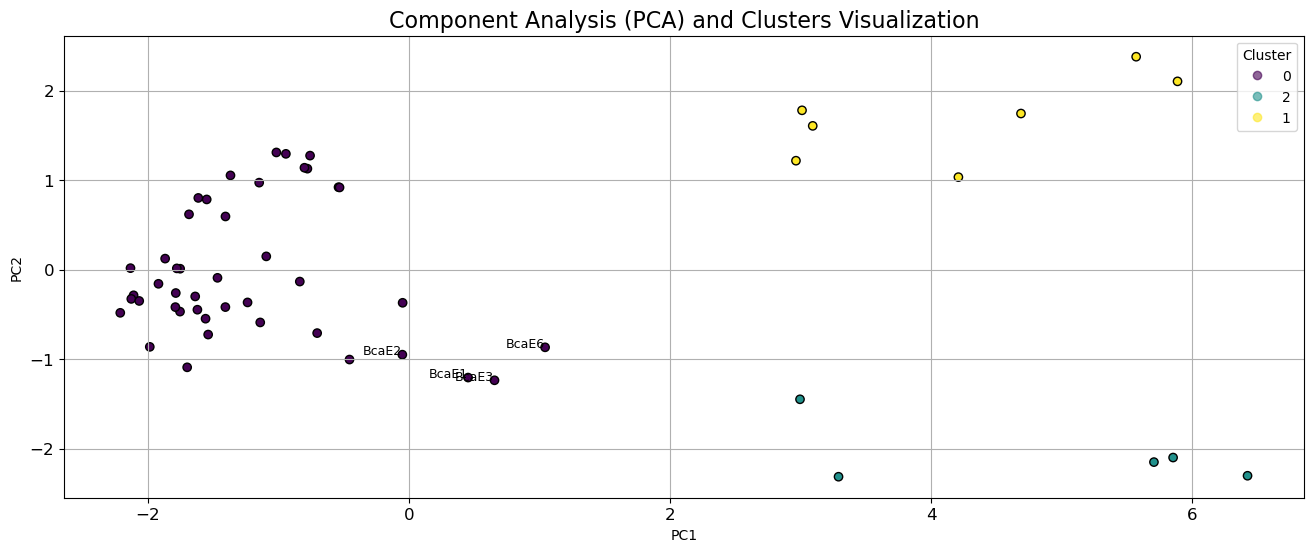

In [39]:
plt.rcdefaults()  # Reset to default values

# Create fifure with adecuate proportion
fig, ax = plt.subplots(figsize=(16, 6))

# Graphis cluster with different colors
scatter = ax.scatter(df_3k['PC1'], df_3k['PC2'], c=df_3k['Cluster'].astype('category').cat.codes, cmap='viridis', edgecolor='black')

# Add labels to the differents clusters
for i in indices_a_etiquetar:
    ax.text(df_3k['PC1'][i], df_3k['PC2'][i], df_3k['Specimen'][i], fontsize=9, ha='right')

# Add title
ax.set_title('Component Analysis (PCA) and Clusters Visualization', fontsize = 16)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Add cluster´s legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
ax.legend(handles, df_3k['Cluster'].unique(), title="Cluster")

# Show the graph
plt.show()

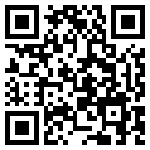

In [42]:
# Transform URL to QR Cose
url = "https://github.com/mezaacor/ECSMGE24"

# Generate QR Code
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=1,border=1)
qr.add_data(url)
qr.make(fit=True)

# Crear una imagen del código QR
img = qr.make_image(fill_color="black", back_color="white")

# Adjust image size
img = img.resize((150, 150), PilImage.LANCZOS)

# Save the QR image
img.save("codigo_qr.png")

# Show the QR image
display(Image(filename="codigo_qr.png"))